In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
!pip install NRCLex

     |████████████████████████████████| 396 kB 5.1 MB/s 
  Created wheel for NRCLex: filename=NRCLex-3.0.0-py3-none-any.whl size=43328 sha256=06d31e28c18325beee035b8290f29552f0dda39c5851483621b809a5b756ca2d
  Stored in directory: /root/.cache/pip/wheels/af/2c/9c/dfa19d1b65326c520b32850a9311f6d4eda679ac04dba26081
Successfully built NRCLex


In [ ]:
# Importing packages and libraries
import pandas as pd
import matplotlib.pyplot as plt
from nrclex import NRCLex
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
#Load new dataset
data = pd.read_csv('/content/gdrive/My Drive/PhD/Program_Doc/Assignment/Project_Dataset/Labelled_Pos_Neg1.csv')
data.head()

,username,author_location,text,created_at,Sentiment,compound,label,is_neg,is_neutral,is_pos
0,cloudslicer,NaN,This creeping extension of social control and ...,2021-02-14 23:49:18+00:00,positive,0.2023,1.0,0,0,1
1,JohnStauber,Citizen-at-Large,#Vaccinepassports' could be used inside the Un...,2021-02-14 23:45:25+00:00,positive,0.4215,1.0,0,0,1
2,SRL_82,"Melton Mowbray, England",The UK should take the lead in creating a glob...,2021-02-14 23:43:01+00:00,positive,0.2960,1.0,0,0,1
3,flackster,Middle-earth,"🏁100,000 signatures received - THANK YOU! 🏁🙏We...",2021-02-14 23:28:10+00:00,positive,0.8133,1.0,0,0,1
4,shalomegrace1,NaN,Here's the war criminal pushing #vaccinepasspo...,2021-02-14 23:19:49+00:00,negative,-0.8399,-1.0,1,0,0


In [ ]:
#data['Text_emotion']  = data['Text_punc'] .apply(lambda x: ','.join(x for x in str(x)))
len(data.index)

40576

In [ ]:
emotion =[]
for i in range(len(data)):
  emotions = NRCLex(str(data['text'][i]))
  emotion.append(emotions.top_emotions[0][0])
  #emotion.append(emotions.raw_emotion_scores[0][0]) 
data['emotion'] = emotion



In [ ]:
data.head(30)

,username,author_location,text,created_at,Sentiment,compound,label,is_neg,is_neutral,is_pos,emotion
0,cloudslicer,NaN,This creeping extension of social control and ...,2021-02-14 23:49:18+00:00,positive,0.2023,1.0,0,0,1,trust
1,JohnStauber,Citizen-at-Large,#Vaccinepassports' could be used inside the Un...,2021-02-14 23:45:25+00:00,positive,0.4215,1.0,0,0,1,fear
2,SRL_82,"Melton Mowbray, England",The UK should take the lead in creating a glob...,2021-02-14 23:43:01+00:00,positive,0.2960,1.0,0,0,1,positive
3,flackster,Middle-earth,"🏁100,000 signatures received - THANK YOU! 🏁🙏We...",2021-02-14 23:28:10+00:00,positive,0.8133,1.0,0,0,1,positive
4,shalomegrace1,NaN,Here's the war criminal pushing #vaccinepasspo...,2021-02-14 23:19:49+00:00,negative,-0.8399,-1.0,1,0,0,fear
5,boomsbusts,@j0nathandavis for mkts/fin,"The sinister, Huxlean background to #DigitalPa...",2021-02-14 23:19:33+00:00,negative,-0.5994,-1.0,1,0,0,fear
6,Artec7793,"California, USA",The agenda is obvious for those with eyes to s...,2021-02-14 23:12:18+00:00,negative,-0.5719,-1.0,1,0,0,fear
7,paragonlink,Éire,Love the idea of losing our basic human rights...,2021-02-14 23:10:19+00:00,negative,-0.4871,-1.0,1,0,0,anger
8,midgard_misfit,Planet Designation: Earth-666,The agenda is obvious for those with eyes to s...,2021-02-14 23:10:18+00:00,negative,-0.5719,-1.0,1,0,0,fear
9,driftwood10000,NaN,#VaccinePassports = white-collar crime,2021-02-14 22:59:54+00:00,negative,-0.5423,-1.0,1,0,0,anger


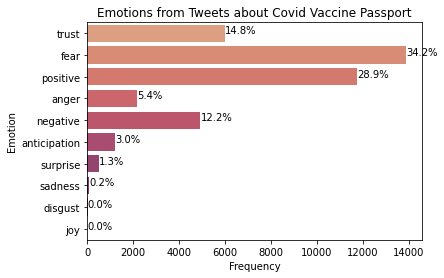

<Figure size 432x288 with 0 Axes>

In [ ]:
import seaborn as sns
graph = sns.countplot(y = "emotion", data = data, palette = "flare")
graph.set(xlabel = 'Frequency', ylabel = 'Emotion', title = 'Emotions from Tweets about Covid Vaccine Passport')
total = len(data['emotion'])
for p in graph.patches:
        percentage = '{:.1f}%'.format(100 * p.get_width()/total)
        #print(percentage)
        x = p.get_x() + p.get_width() + 0.02
        y = p.get_y() + p.get_height()/2
        graph.annotate(percentage, (x, y))

plt.show()
#plt.axis('equal')
#figure = graph.get_figure()
plt.savefig('/content/gdrive/My Drive/PhD/Program_Doc/Assignment/Project_Dataset/emotion_final1.png') 

In [ ]:
#Save new data to file
data.to_csv('/content/gdrive/My Drive/PhD/Program_Doc/Assignment/Project_Dataset/Emotion_final1.csv', encoding='utf-8', index=False)

In [ ]:
#Load new dataset
tweets_df = pd.read_csv('/content/gdrive/My Drive/PhD/Program_Doc/Assignment/Project_Dataset/Emotion.csv')
tweets_df.head()

,username,author_location,text,created_at,Text_punc,Text_stop,Text_tokenized,Text_lemmatized,Text_cleaned,Sentiment,neg,neu,pos,compound,emotion
0,cloudslicer,NaN,this creeping extension of social control and ...,2021-02-14 23:49:18+00:00,this creeping extension of social control and ...,creeping extension social control power state ...,"['creeping', 'extension', 'social', 'control',...","['creeping', 'extension', 'social', 'control',...",creeping extension social control power state ...,positive,0.000,0.833,0.167,0.2023,trust
1,JohnStauber,Citizen-at-Large,#vaccinepassports' could be used inside the un...,2021-02-14 23:45:25+00:00,vaccinepassports could be used inside the unit...,vaccinepassports could used inside united kingdom,"['vaccinepassports', 'could', 'used', 'inside'...","['vaccinepassports', 'could', 'used', 'inside'...",vaccinepassports could used inside united kingdom,positive,0.000,0.641,0.359,0.4215,trust
2,SRL_82,"Melton Mowbray, England",the uk should take the lead in creating a glob...,2021-02-14 23:43:01+00:00,the uk should take the lead in creating a glob...,uk take lead creating global coronavirus vacci...,"['uk', 'take', 'lead', 'creating', 'global', '...","['uk', 'take', 'lead', 'creating', 'global', '...",uk take lead creating global coronavirus vacci...,positive,0.000,0.686,0.314,0.6705,positive
3,flackster,Middle-earth,"🏁100,000 signatures received - thank you! 🏁🙏we...",2021-02-14 23:28:10+00:00,100000 signatures received thank you were gra...,100000 signatures received thank grateful ever...,"['100000', 'signatures', 'received', 'thank', ...","['100000', 'signature', 'received', 'thank', '...",100000 signature received thank grateful every...,positive,0.000,0.448,0.552,0.7497,positive
4,shalomegrace1,NaN,here's the war criminal pushing #vaccinepasspo...,2021-02-14 23:19:49+00:00,heres the war criminal pushing vaccinepassport...,heres war criminal pushing vaccinepassports ev...,"['heres', 'war', 'criminal', 'pushing', 'vacci...","['here', 'war', 'criminal', 'pushing', 'vaccin...",here war criminal pushing vaccinepassports eve...,negative,0.554,0.446,0.000,-0.8271,fear


In [ ]:
labels = tweets_df.groupby('emotion').count().index.values
values = tweets_df.groupby('emotion').size().values

In [ ]:
print(values)

[ 2014  1336    15 10182    10  5717 14150    97   484  6606]


In [ ]:
#create new data frames for all emotions
tweet_trust = tweets_df[tweets_df["emotion"] == "trust"]
tweet_positive = tweets_df[tweets_df["emotion"] == "positive "]
tweet_fear = tweets_df[tweets_df["emotion"] == "fear"]
tweet_anger = tweets_df[tweets_df["emotion"] == "anger "]
tweet_surprise = tweets_df[tweets_df["emotion"] == "surprise"]
tweet_negative = tweets_df[tweets_df["emotion"] == "negative"]
tweet_anticipation = tweets_df[tweets_df["emotion"] == "anticipation"]
tweet_sadness = tweets_df[tweets_df["emotion"] == "sadness"]
tweet_joy = tweets_df[tweets_df["emotion"] == "joy"]
tweet_disgust = tweets_df[tweets_df["emotion"] == "disgust"]
#function for calculating the percentage of all the sentiments
def calc_percentage(x,y):
    return x/y * 100
trust_per = calc_percentage(len(tweet_trust), len(tweets_df))
pos_per = calc_percentage(len(tweet_positive), len(tweets_df))
neg_per = calc_percentage(len(tweet_negative), len(tweets_df))
fear_per = calc_percentage(len(tweet_fear), len(tweets_df))
anger_per = calc_percentage(len(tweet_anger), len(tweets_df))
surprise_per = calc_percentage(len(tweet_surprise), len(tweets_df))
anticipation_per = calc_percentage(len(tweet_anticipation), len(tweets_df))
sadness_per = calc_percentage(len(tweet_sadness), len(tweets_df))
joy_per = calc_percentage(len(tweet_joy), len(tweets_df))
disgust_per = calc_percentage(len(tweet_disgust), len(tweets_df))
print(pos_per)
#print("positive: {} {}%".format(len(tweet_positive),  format(pos_per, '.1f')))

0.0
